In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import preprocessor as p
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string
import inflect
from tqdm import tqdm
import matplotlib.pyplot as plt


In [3]:
#import database
df = pd.read_csv("../Database/IMDB Dataset Cleaned.csv")
df = df[['cleaned_review', 'sentiment']]

In [4]:
#replace positive with 1 and negative with 0
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

# **Support Vector Machine**

In [5]:
#support vector machine model using tfidf vectorizer and scki-learn library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

#split data into training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], random_state=0)

#tfidf vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

#fit and transform training data
tfidf_train = tfidf.fit_transform(X_train)

#transform testing data
tfidf_test = tfidf.transform(X_test)


In [6]:
def check_linearity(x, y):
    """
    Check linearity between two variables using scatter plots and correlation analysis.

    Parameters:
    x (array-like): The independent variable.
    y (array-like): The dependent variable.

    Returns:
    is_linear (bool): True if the data appears to be linearly related, False otherwise.
    """
    # Check if the input arrays have the same length
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length.")

    # Create a scatter plot
    plt.scatter(x, y, marker='o', color='b', alpha=0.5)
    plt.xlabel("Independent Variable")
    plt.ylabel("Dependent Variable")
    plt.title("Scatter Plot")

    # Calculate the Pearson correlation coefficient
    correlation_coefficient = np.corrcoef(x, y)[0, 1]

    # Determine if the data appears to be linearly related
    is_linear = abs(correlation_coefficient) >= 0.7  # Adjust the threshold as needed

    # Print the correlation coefficient
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")

    # Display the plot
    plt.show()

    return is_linear

In [7]:
#initialize svm model
svm_model = svm.SVC(kernel='linear')

#fit model
svm_model.fit(tfidf_train, y_train)

SVC(kernel='linear')

In [8]:
predictions = svm_model.predict(tfidf_test)

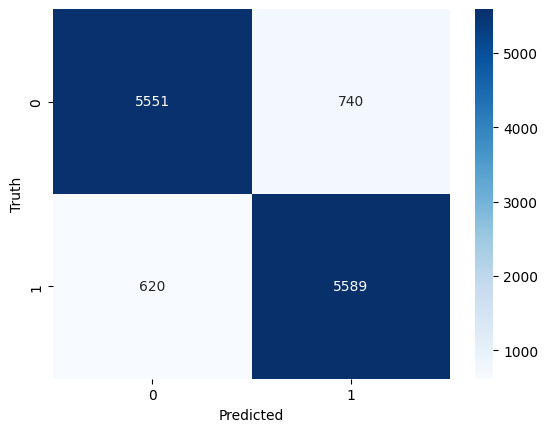

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#use seaborn to plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#axis labels
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [10]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy score: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy score:  0.8912
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6291
           1       0.88      0.90      0.89      6209

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

